# DATA 620, Assignment 4: High Frequency Words
#### June 26, 2017

### Group 1 Members:

* Mauricio Alarcon
* Sekhar Mekala
* Aadi Kalloo
* Srinivasa Illapani
* Param Singh

In [1]:
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

For this study of high frequency words using *NLTK* we have elected to download * A Tale of Two Cities* by Charles Dickens. This text is available from Project Gutenberg and we access the file using the link in the code below. 


In [2]:
import urllib2
url = 'https://www.gutenberg.org/files/98/98-0.txt'
response = urllib2.urlopen(url)

raw = response.read().decode('utf8')

In [3]:
len(raw)

792974

In [4]:
raw[:75]

u'\ufeffThe Project Gutenberg EBook of A Tale of Two Cities, by Charles Dickens\r\n\r'

The variable raw contains a string with 792,974 characters. This is the raw content of the book, including many details we are not interested in such as whitespace, line breaks and blank lines. Notice the \r and \n in the opening line of the file, which is how Python displays the special carriage return and line feed characters. For our language processing, we want to break up the string into words and punctuation. This step is called tokenization, and it produces our familiar structure, a list of words and punctuation.

## Identify the corpus text, Tokenization

Project Gutenberg texts contain extra data in the header and footer of the text. We need to limit the corpus to just the text of the book and do so with the code below. This must be done by hand since each book has a slightly different header and footer text.

In [5]:
raw.find("I. The Period")


2646

In [6]:
raw.rfind("End of the Project Gutenberg EBook of A Tale of Two Cities, by Charles Dickens")

773848

In [7]:
raw = raw[2646:773848]

In [8]:
nltk.download('punkt')
tokens = word_tokenize(raw)
len(tokens)
tokens[:10]

words = [w for w in tokens if w.isalpha()]
words = [w.lower() for w in words]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\purna.illapani\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
len(tokens)

166500

## Total Unique Words
We have elected to count the total number of unique words. To start with, just count the number of unique words in all of their variants. And use the WordNet Lemmatizer to reduce the words in the text to their root lemma (for example - run, runs, ran and running are forms of the same lexeme, with run as the lemma). This also compressed the text to a smaller set.

### Using all Variations of a Word
We find that using all variations of a word gives us 9526 unique words in the text.

In [10]:
len(set(words))

9526

## Top 200 Words
We next use the built in frequency distribution function in *NLTK* to count the frequency of each word in the text. We then built a plot of these 100 words. We also decided to remove the most common start words and plot a graph of these words as well. We see from this second graph that Holmes occurs more than 450 times in the text.

In [17]:
fd = nltk.FreqDist(words)
top_words = fd.most_common(200)
top_wordsdf = pd.DataFrame(top_words, columns = ['Word', 'Count'])
top_wordsdf.head(5)

,Word,Count
0,the,8022
1,and,4980
2,of,4005
3,to,3474
4,a,2937


In [18]:
top_wordsdf.tail(5)

,Word,Count
195,tell,92
196,tellson,92
197,men,91
198,take,90
199,better,89


# Plot of the 100 Most Common Words

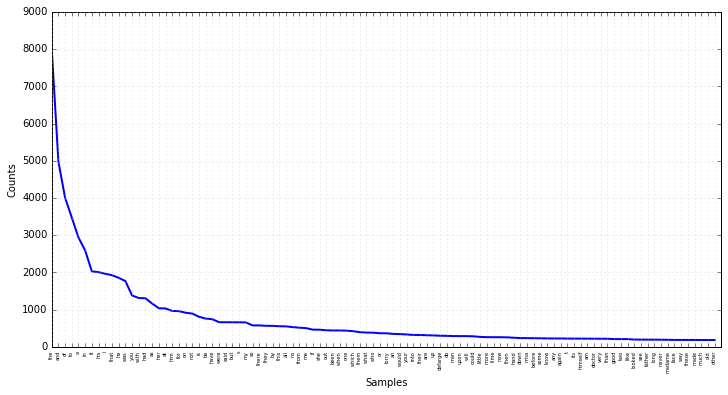

In [19]:
# plot the top 100
plt.figure(figsize=(12, 6))
plt.rc('xtick', labelsize=5) 
fd.plot(100)

## Plot of the Top Words with Common Words in English Removed

In [20]:
nltk.download('stopwords')
stoplist = stopwords.words('english')
uwords = [w for w in words if w not in stoplist]
ufd = nltk.FreqDist(uwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\purna.illapani\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


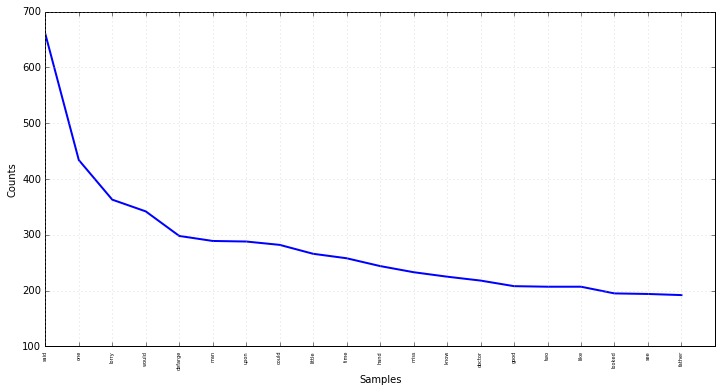

In [21]:
plt.figure(figsize=(12, 6))
ufd.plot(20)

## Testing Zipf's Law
Finally we test the performance of our text in accordance to Zipf's Law by plotting the frequency of the top 100 words on a log scale. We would expect that this forms a straight line but as we discuss below this was not the case.

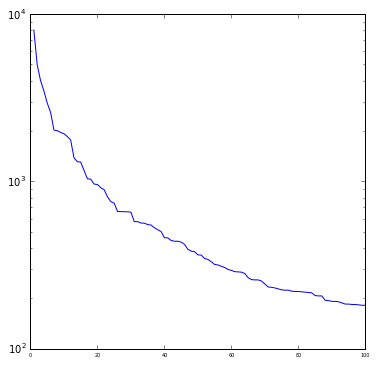

In [22]:
zl_words = top_words = fd.most_common(100)
x_vec = [i+1 for i in range(len(zl_words))]
y_vec = [freq for (word,freq) in zl_words]

plt.figure(1, figsize=(6,6))
plt.semilogy(x_vec, y_vec)
plt.show()

According to Zipf's Law we expect if the most common word occurs n times then the next most common word should occur n/2 times and so on. On a log scale graph this would be a straight line. We can see from our text that this is not the case. It appears that top words "the" and "and" follow Zipf's law, we would expect to see a reduction more similar to a straight line on the log scale however the rest of the top words do not as their freqencies do follow thw n/2 pattern. This plot gives us the curved graph that we see above.

Compared to all texts I think that this corpus uses the same “common” words as we would find across all corpus in the English language. However given our graph from testing Zipf’s Law we see that the author uses the word “the” more often than we would expect and then uses the rest of his common vocabulary in similar sizes. 